In [2]:
import sys
sys.path.insert(0, '_libs/')

In [3]:
import glob
import scipy.io
import numpy as np
import netCDF4 as nc
import NEMO_tools as Nts
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
% matplotlib inline

In [10]:
boundary_name=glob.glob('_data/Exchange/Ba_boundary_ANHA4.mat')
Boundary_Mat=scipy.io.loadmat(boundary_name[0])
#Ba_boundary=Boundary_Mat['Ba_boundary']
domain = Boundary_Mat['domain']

In [8]:
MAT = scipy.io.loadmat('_data/Exchange/NEMO_ANHA4_Ba.mat')
Ba_ini_ANHA4 = MAT['Ba_ini_ANHA4']

In [5]:
ptrc_obj = nc.Dataset('_data\EXP09_1m_20100101_20100323_ptrc_T.nc')
Ba=ptrc_obj.variables['Ba'][:]
#d18O=ptrc_obj.variables['d18O'][:]
nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]
deptht=ptrc_obj.variables['deptht'][:]

In [14]:
domain.shape

(544L, 800L)

In [16]:
L = 0
lev1 = range(40, 73, 3)
lev2 = [-14, -10, -6, -2, 2, 6, 10, 14]

In [15]:
Ba_Feb = np.ma.masked_where(((domain.T==0) | (Ba[1, L, :, :]==0)), Ba[1, L, :, :])

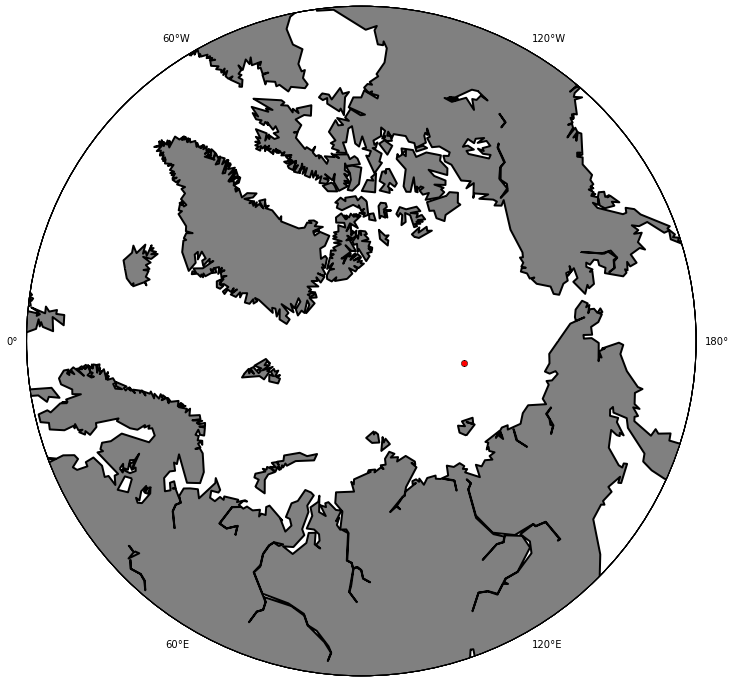

In [40]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()

proj=Basemap(projection='npstere', resolution='c', boundinglat=55, lon_0=90, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
proj.drawcoastlines(linewidth=2.0, linestyle='-', color='k')
x, y=proj(nav_lon, nav_lat)
# Ba
#CS=proj.contourf(x, y, Ba_Feb, lev1, cmap=plt.cm.gist_ncar_r, extend='both')
#proj.contour(x, y, Ba_Feb, lev1, linewidths=1.5, colors=('gray',))

proj.plot(x[700, 300], y[700, 300], 'ro')

#cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
#CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
#CBar.set_label('nM', fontsize=12)
#CBar.ax.tick_params(axis='x', length=22)
#CBar.set_ticks(lev1)

In [23]:
np.nanmax(Ba_Feb)

F:\Anaconda\lib\site-packages\numpy\lib\nanfunctions.py:331: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)


nan